<a href="https://colab.research.google.com/github/Tharunaadhitiya/Prodigy-task5/blob/main/task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

ValueError: could not convert string to float: 'Monday'

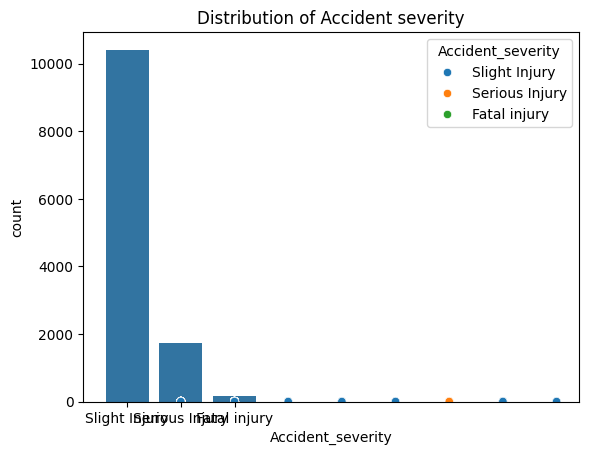

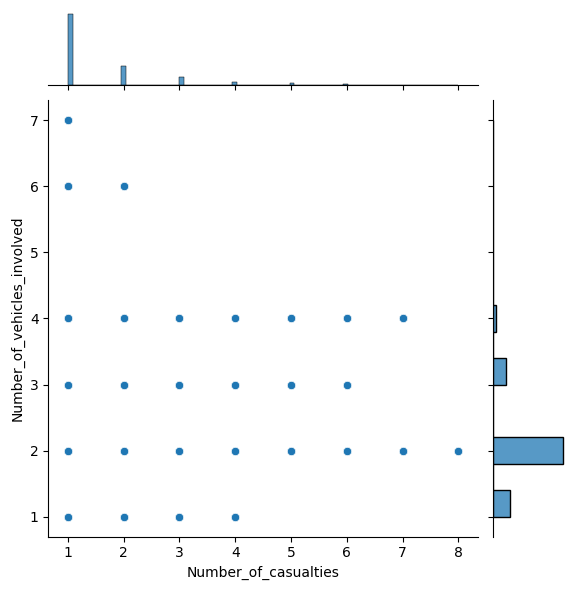

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#load and read the file
df=pd.read_csv("RTA Dataset.csv")
df.head()
#shape/ size of the data
df.shape
#checking the numerical statistics of the data
df.describe()
df.describe(include="all")
#checking data types of each columns
df.info()
#finding duplicate values
df.duplicated().sum()
#Distribution of Accident severity
df['Accident_severity'].value_counts()
#plotting the final class
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')
#checking missing values
df.isna().sum()
#dropping columns which has more than 2500 missing values and Time column
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'],
        axis = 1, inplace = True)
df.head()
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)
#checking the current null values
df.isna().sum()
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])
#joint Plot
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df)
#checking the correlation between numerical columns
df.corr()
#plotting the correlation using heatmap
sns.heatmap(df.corr())
#storing numerical column names to a variable
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1
    #count plot for categorical values
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
    df.dtypes
    #importing label encoing module
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#creating a new data frame from performing the chi2 analysis
df1=pd.DataFrame()

#adding all the categorical columns except the output to new data frame
for i in categorical:
    if i!= 'Accident_severity':
        df1[i]=le.fit_transform(df[i])
#confirming the data type
df1.info()

plt.figure(figsize=(22,17))
sns.set(font_scale=1)
sns.heatmap(df1.corr(), annot=True)
#label encoded data set
df1.head()
#import chi2 test
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])
#f_p_values will return Fscore and pvalues
f_p_values
#for better understanding and ease of access adding them to a new dataframe
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1
#since we want lower Pvalues we are sorting the features
f_p_values1.sort_values(by='Pvalues',ascending=True)
#after evaluating we are removing lesser important columns and storing to a new data frame
df2=df.drop(['Owner_of_vehicle', 'Type_of_vehicle', 'Road_surface_conditions', 'Pedestrian_movement',
         'Casualty_severity','Educational_level','Day_of_week','Sex_of_driver','Road_allignment',
         'Sex_of_casualty'],axis=1)
df2.head()
df2.shape
df2.info()
#to check distinct values in each categorical columns we are storing them to a new variable
categorical_new=[i for i in df2.columns if df2[i].dtype=='O']
print(categorical_new)
for i in categorical_new:
    print(df2[i].value_counts())
    #get_dummies
dummy=pd.get_dummies(df2[['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
                          'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
                          'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
                          'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident']],drop_first=True)
dummy.head()
#dropping dummied columns
df3.drop(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
          'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
          'Vehicle_movement','Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident'],axis=1,inplace=True)
df3.head()
x=df3.drop(['Accident_severity'],axis=1)
x.shape
x.head()
y=df3.iloc[:,2]
y.head()
#checking the count of each item in the output column
y.value_counts()
#plotting count plot using seaborn
sns.countplot(x = y, palette='muted')
#importing SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()
sns.countplot(x = yo, palette='muted')
#converting data to training data and testing data
from sklearn.model_selection import train_test_split
#splitting 70% of the data to training data and 30% of data to testing data
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#KNN model alg
from sklearn.neighbors import KNeighborsClassifier
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#load and read the file
df=pd.read_csv("RTA Dataset.csv")
df.head()
#shape/ size of the data
df.shape
#checking the numerical statistics of the data
df.describe()
df.describe(include="all")
#checking data types of each columns
df.info()
#finding duplicate values
df.duplicated().sum()
#Distribution of Accident severity
df['Accident_severity'].value_counts()
#plotting the final class
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')
#checking missing values
df.isna().sum()
#dropping columns which has more than 2500 missing values and Time column
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'],
        axis = 1, inplace = True)
df.head()
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)
#checking the current null values
df.isna().sum()
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])
#joint Plot
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df)
#checking the correlation between numerical columns
df.corr()
#plotting the correlation using heatmap
sns.heatmap(df.corr())
#storing numerical column names to a variable
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1
    #count plot for categorical values
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
    df.dtypes
    #importing label encoing module
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#creating a new data frame from performing the chi2 analysis
df1=pd.DataFrame()

#adding all the categorical columns except the output to new data frame
for i in categorical:
    if i!= 'Accident_severity':
        df1[i]=le.fit_transform(df[i])
#confirming the data type
df1.info()

plt.figure(figsize=(22,17))
sns.set(font_scale=1)
sns.heatmap(df1.corr(), annot=True)
#label encoded data set
df1.head()
#import chi2 test
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])
#f_p_values will return Fscore and pvalues
f_p_values
#for better understanding and ease of access adding them to a new dataframe
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1
#since we want lower Pvalues we are sorting the features
f_p_values1.sort_values(by='Pvalues',ascending=True)
#after evaluating we are removing lesser important columns and storing to a new data frame
df2=df.drop(['Owner_of_vehicle', 'Type_of_vehicle', 'Road_surface_conditions', 'Pedestrian_movement',
         'Casualty_severity','Educational_level','Day_of_week','Sex_of_driver','Road_allignment',
         'Sex_of_casualty'],axis=1)
df2.head()
df2.shape
df2.info()
#to check distinct values in each categorical columns we are storing them to a new variable
categorical_new=[i for i in df2.columns if df2[i].dtype=='O']
print(categorical_new)
for i in categorical_new:
    print(df2[i].value_counts())
    #get_dummies
dummy=pd.get_dummies(df2[['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
                          'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
                          'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
                          'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident']],drop_first=True)
dummy.head()
#dropping dummied columns
df3 = pd.concat([df2, dummy], axis=1)
df3.drop(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
          'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
          'Vehicle_movement','Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident'],axis=1,inplace=True)
df3.head()
x=df3.drop(['Accident_severity'],axis=1)
x.shape
x.head()
y=df3.iloc[:,2]
y.head()
#checking the count of each item in the output column
y.value_counts()
#plotting count plot using seaborn
sns.countplot(x = y, palette='muted')
#importing SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()
sns.countplot(x = yo, palette='muted')
#converting data to training data and testing data
from sklearn.model_selection import train_test_split
#splitting 70% of the data to training data and 30% of data to testing data
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#KNN model alg
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train,y_train)
y_pred=model_KNN.predict(x_test)
y_pred
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
report_KNN=classification_report(y_test,y_pred)
print(report_KNN)
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)
matrix_KNN=confusion_matrix(y_test,y_pred)
print(matrix_KNN,'\n')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred) #No need for print here as it already displays.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#load and read the file
df=pd.read_csv("RTA Dataset.csv")
df.head()
#shape/ size of the data
df.shape
#checking the numerical statistics of the data
df.describe()
df.describe(include="all")
#checking data types of each columns
df.info()
#finding duplicate values
df.duplicated().sum()
#Distribution of Accident severity
df['Accident_severity'].value_counts()
#plotting the final class
sns.countplot(x = df['Accident_severity'])
plt.title('Distribution of Accident severity')
#checking missing values
df.isna().sum()
#dropping columns which has more than 2500 missing values and Time column
df.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality','Time'],
        axis = 1, inplace = True)
df.head()
#storing categorical column names to a new variable
categorical=[i for i in df.columns if df[i].dtype=='O']
print('The categorical variables are',categorical)
#for categorical values we can replace the null values with the Mode of it
for i in categorical:
    df[i].fillna(df[i].mode()[0],inplace=True)
#checking the current null values
df.isna().sum()
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved
sns.scatterplot(x=df['Number_of_casualties'], y=df['Number_of_vehicles_involved'], hue=df['Accident_severity'])
#joint Plot
sns.jointplot(x='Number_of_casualties',y='Number_of_vehicles_involved',data=df)
#checking the correlation between numerical columns
df.corr()
#plotting the correlation using heatmap
sns.heatmap(df.corr())
#storing numerical column names to a variable
numerical=[i for i in df.columns if df[i].dtype!='O']
print('The numerica variables are',numerical)
#distribution for numerical columns
plt.figure(figsize=(10,10))
plotnumber = 1
for i in numerical:
    if plotnumber <= df.shape[1]:
        ax1 = plt.subplot(2,2,plotnumber)
        plt.hist(df[i],color='red')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title('frequency of '+i, fontsize=10)
    plotnumber +=1
    #count plot for categorical values
plt.figure(figsize=(10,200))
plotnumber = 1

for col in categorical:
    if plotnumber <= df.shape[1] and col!='Pedestrian_movement':
        ax1 = plt.subplot(28,1,plotnumber)
        sns.countplot(data=df, y=col, palette='muted')
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.title(col.title(), fontsize=14)
        plt.xlabel('')
        plt.ylabel('')
    plotnumber +=1
    df.dtypes
    #importing label encoing module
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

#creating a new data frame from performing the chi2 analysis
df1=pd.DataFrame()

#adding all the categorical columns except the output to new data frame
for i in categorical:
    if i!= 'Accident_severity':
        df1[i]=le.fit_transform(df[i])
#confirming the data type
df1.info()

plt.figure(figsize=(22,17))
sns.set(font_scale=1)
sns.heatmap(df1.corr(), annot=True)
#label encoded data set
df1.head()
#import chi2 test
from sklearn.feature_selection import chi2
f_p_values=chi2(df1,df['Accident_severity'])
#f_p_values will return Fscore and pvalues
f_p_values
#for better understanding and ease of access adding them to a new dataframe
f_p_values1=pd.DataFrame({'features':df1.columns, 'Fscore': f_p_values[0], 'Pvalues':f_p_values[1]})
f_p_values1
#since we want lower Pvalues we are sorting the features
f_p_values1.sort_values(by='Pvalues',ascending=True)
#after evaluating we are removing lesser important columns and storing to a new data frame
df2=df.drop(['Owner_of_vehicle', 'Type_of_vehicle', 'Road_surface_conditions', 'Pedestrian_movement',
         'Casualty_severity','Educational_level','Day_of_week','Sex_of_driver','Road_allignment',
         'Sex_of_casualty'],axis=1)
df2.head()
df2.shape
df2.info()
#to check distinct values in each categorical columns we are storing them to a new variable
categorical_new=[i for i in df2.columns if df2[i].dtype=='O']
print(categorical_new)
for i in categorical_new:
    print(df2[i].value_counts())
    #get_dummies
dummy=pd.get_dummies(df2[['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience',
                          'Area_accident_occured', 'Lanes_or_Medians', 'Types_of_Junction', 'Road_surface_type',
                          'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
                          'Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident']],drop_first=True)
dummy.head()
#dropping dummied columns
df3 = pd.concat([df2, dummy], axis=1) # You were missing this line to combine the dummy variables
df3.drop(['Age_band_of_driver', 'Vehicle_driver_relation', 'Driving_experience', 'Area_accident_occured', 'Lanes_or_Medians',
          'Types_of_Junction', 'Road_surface_type', 'Light_conditions', 'Weather_conditions', 'Type_of_collision',
          'Vehicle_movement','Casualty_class', 'Age_band_of_casualty', 'Cause_of_accident'],axis=1,inplace=True)
df3.head()
x=df3.drop(['Accident_severity'],axis=1)
x.shape
x.head()
y=df3.iloc[:,2]
y.head()
#checking the count of each item in the output column
y.value_counts()
#plotting count plot using seaborn
sns.countplot(x = y, palette='muted')
#importing SMOTE
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
xo,yo=oversample.fit_resample(x,y)
#checking the oversampling output
y1=pd.DataFrame(yo)
y1.value_counts()
sns.countplot(x = yo, palette='muted')
#converting data to training data and testing data
from sklearn.model_selection import train_test_split
#splitting 70% of the data to training data and 30% of data to testing data
x_train,x_test,y_train,y_test=train_test_split(xo,yo,test_size=0.30,random_state=42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)
#KNN model alg
from sklearn.neighbors import KNeighborsClassifier
model_KNN=KNeighborsClassifier(n_neighbors=5)
model_KNN.fit(x_train,y_train)
y_pred=model_KNN.predict(x_test)
y_pred
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,ConfusionMatrixDisplay
report_KNN=classification_report(y_test,y_pred)
print(report_KNN)
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)
matrix_KNN=confusion_matrix(y_test,y_pred)
print(matrix_KNN,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
accuracy_KNN=accuracy_score(y_test,y_pred)
print(accuracy_KNN)
matrix_KNN=confusion_matrix(y_test,y_pred)
print(matrix_KNN,'\n')
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
